# CS 454 Final Paper: Kernel PCA with The Kernel Trick vs Nyström Approximation

## Author: Chloe Wohlgemuth (cbw975@gmail.com)

### MNIST Data Set

Downloaded from Kaggle : https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [68]:
import numpy as np
import matplotlib.pyplot as plt
# data = np.genfromtxt("train_MNIST.csv", dtype=float, delimiter=',', names=True) 
import pandas as pd

digits = [2,6]
df = pd.read_csv('train_MNIST.csv')
df = df[df.label.isin(digits)]  # keep only digits of class 3 or 5
print(df.head(5)) # print first five rows of d0.

# store data as np array
d = df.to_numpy()
labels, data = d[:,0], d[:,1:]  # store labels and pixel data

print("data.shape:",data.shape)
print("labels.shape:",labels.shape)

    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
5       2    0    0    0    0    0    0    0    0    0  ...      0      0   
13      6    0    0    0    0    0    0    0    0    0  ...      0      0   
16      2    0    0    0    0    0    0    0    0    0  ...      0      0   
18      6    0    0    0    0    0    0    0    0    0  ...      0      0   
25      2    0    0    0    0    0    0    0    0    0  ...      0      0   

    28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
5       0      0      0      0      0      0      0      0  
13      0      0      0      0      0      0      0      0  
16      0      0      0      0      0      0      0      0  
18      0      0      0      0      0      0      0      0  
25      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
data.shape: (11876, 784)
labels.shape: (11876,)


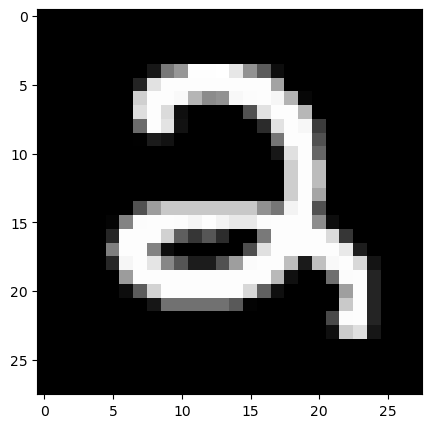

2


In [69]:
## Plot example digit
plt.figure(figsize=(5,5))
idx = 200

grid_data = np.asmatrix(data[idx]).reshape(28,28)  # reshape to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels[idx])

## 2D Visualization - PCA

In [85]:
from sklearn.decomposition import PCA

pca = PCA(2)
data_pca = pca.fit_transform(data)

print("data_pca.shape:",data_pca.shape)  # reduced shape / dimensionality

data_pca.shape: (11876, 2)


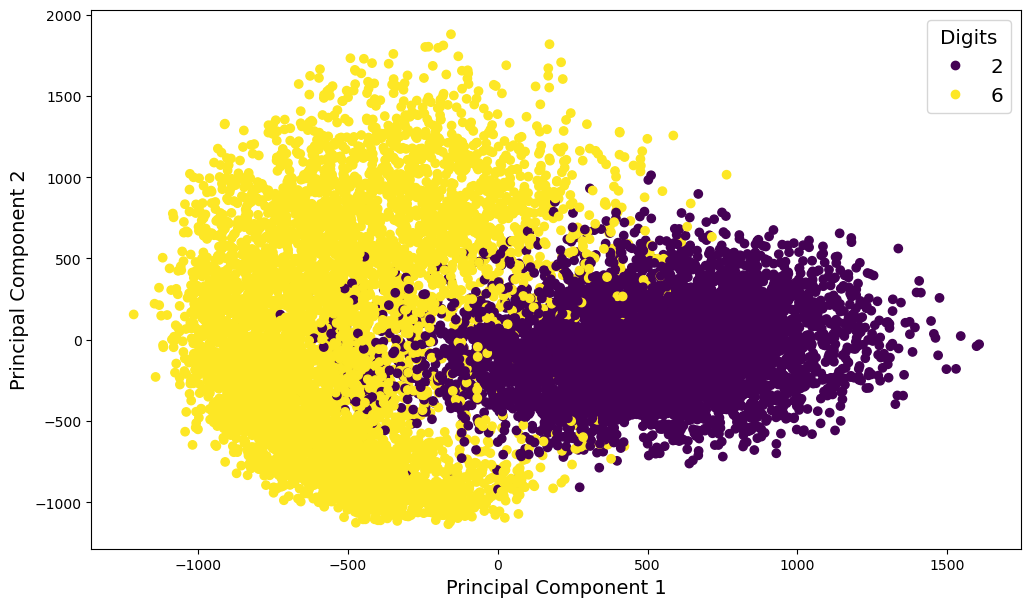

In [22]:
plt.figure(figsize=(12,7))
scatter = plt.scatter(x=data_pca.T[0],y=data_pca.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("outputs/plot_2D_PCA_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


## PCA Dimensionality Reduction

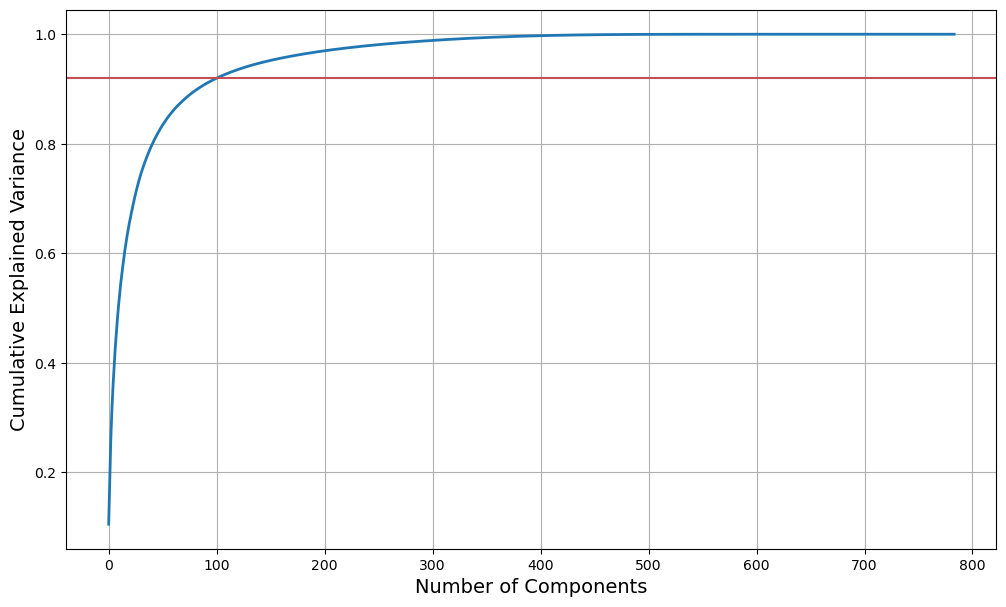

In [23]:
pca = PCA(784)
pca_data = pca.fit_transform(data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(12,7))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axhline(y=0.92, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)

# plt.savefig("outputs/plot_PCA_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

# If we take 100-dimensions, approximately 92% of variance is expalined.

In [87]:
pca = PCA(784)
data_kpca = pca.fit_transform(data)
reconstructed = pca.inverse_transform(data_kpca)
error = np.linalg.norm(data - reconstructed)
print(error)

4.877417389263414e-10


## KPCA with The Kernel Trick

In [58]:
from sklearn.decomposition import KernelPCA

data_kpca.shape: (11876, 2)


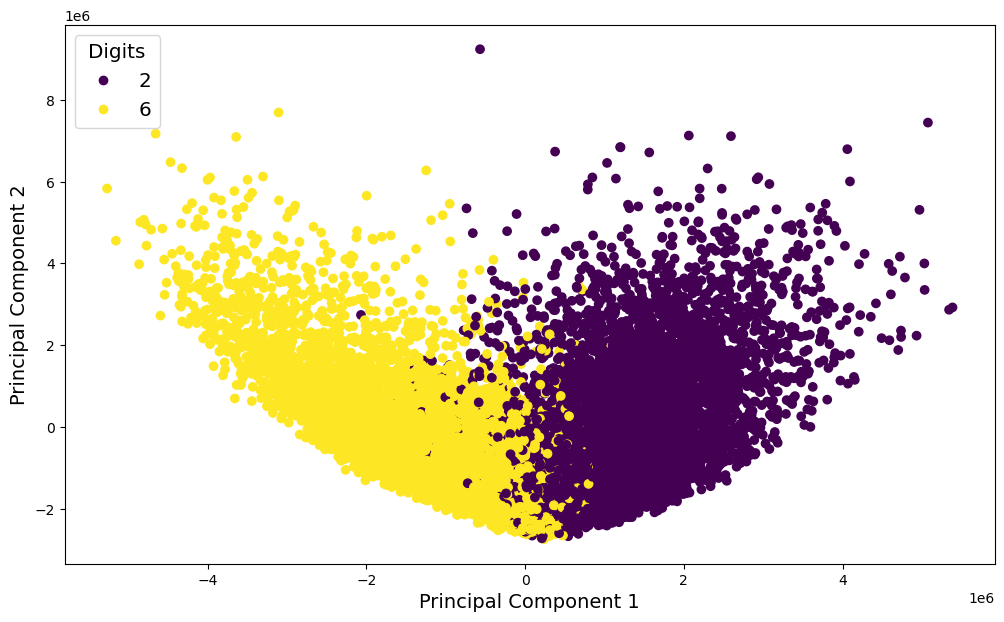

In [70]:
## Polynomial Kernel

kpca = KernelPCA(n_components=2, kernel='poly', gamma=1.0, coef0=1.0, degree=2)

data_kpca = kpca.fit_transform(data)
print("data_kpca.shape:",data_kpca.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,7))
scatter = plt.scatter(x=data_kpca.T[0],y=data_kpca.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("outputs/plot_2D_KPCA_poly_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


In [88]:
kpca = KernelPCA(n_components=784, kernel='poly', gamma=1.0, coef0=0, degree=2, fit_inverse_transform=True)
# kpca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
print(data.shape)
t = kpca.fit(data)
data_kpca = kpca.transform(data)
print("data_kpca.shape",data_kpca.shape)
print("data_kpca[:5]",data_kpca[:5])
reconstructed = kpca.inverse_transform(data_kpca)
print("reconstructed.shape",reconstructed.shape)
print("reconstructed[:5]",reconstructed[:5])
error = np.linalg.norm(data - reconstructed)
print(error)

(11876, 784)
data_kpca.shape (11876, 784)
data_kpca[:5] [[ 7.68598811e+05  6.05880108e+05 -1.42544837e+06 ... -2.21246516e+04
  -5.14704853e+04  2.07020737e+04]
 [-1.93016835e+06  6.03745998e+05 -3.61403975e+05 ... -5.52246671e+04
  -1.14948170e+05  2.97686114e+04]
 [ 1.29588807e+06 -4.17365273e+05 -9.74246825e+04 ...  7.02077364e+04
  -9.73974689e+03  6.08199936e+04]
 [-2.59211896e+05 -2.42057952e+06 -1.60791200e+05 ...  1.53371402e+04
   1.96564046e+04  2.19316511e+03]
 [ 3.31066931e+06  1.98263660e+06  8.81482504e+05 ...  2.18456095e+04
  -8.61206457e+04  3.49376706e+03]]
reconstructed.shape (11876, 784)
reconstructed[:5] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3.1159412697520945e-08


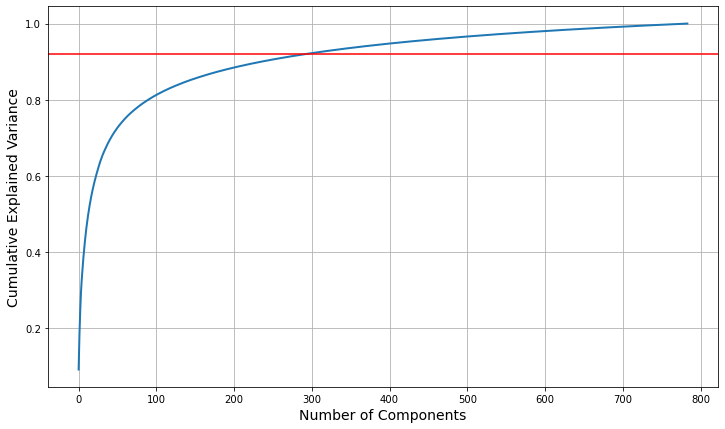

In [7]:
kpca = KernelPCA(n_components=784, kernel='poly', gamma=1.0, coef0=1.0, degree=2)
# kpca = KernelPCA(n_components=n_comps, kernel='rbf', gamma=1.0, coef0=0)
data_kpca = kpca.fit_transform(data)

explained_variance = np.var(data_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Plot the KPCA spectrum
plt.figure(1, figsize=(12,7))

plt.clf()
plt.plot(explained_variance_cumulative, linewidth=2)
plt.axhline(y=0.92, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)

plt.savefig("outputs/plot_KPCA_poly_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

# If we take 300-dimensions, approx. 92% of variance is expalined.

data_kpca.shape: (11876, 2)


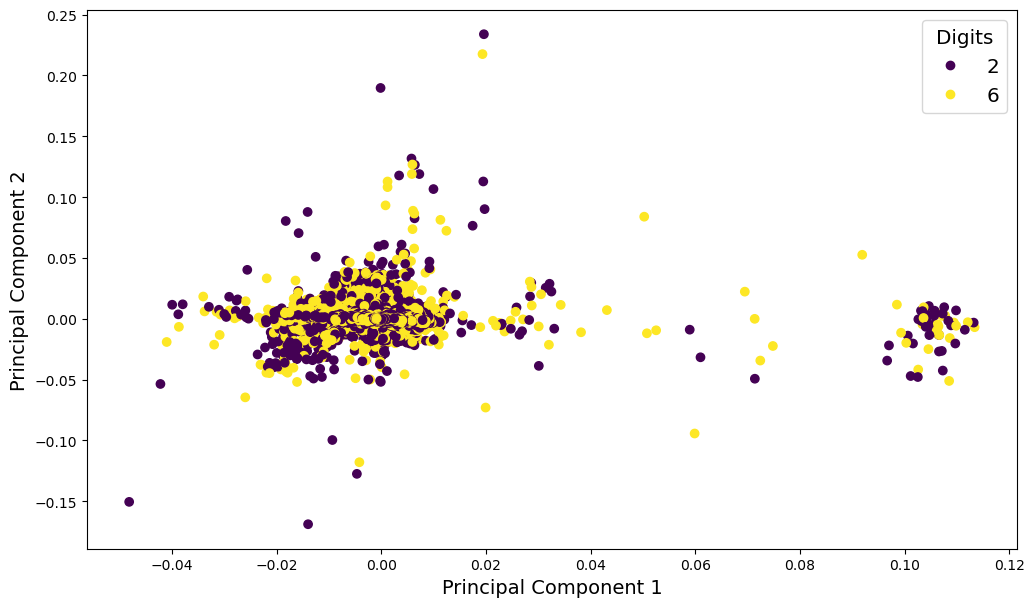

In [60]:
## RBF Kernel

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1.0, coef0=0)

data_kpca = kpca.fit_transform(data)
print("data_kpca.shape:",data_kpca.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,7))
scatter = plt.scatter(x=data_kpca.T[0],y=data_kpca.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("outputs/plot_2D_KPCA_RBF_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


In [92]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1.0, coef0=0, fit_inverse_transform=True)
print(data.shape)
t = kpca.fit(data)
data_kpca = kpca.transform(data)
print("data_kpca.shape",data_kpca.shape)
print("data_kpca[:5]",data_kpca[:5])
reconstructed = kpca.inverse_transform(data_kpca)
print("reconstructed.shape",reconstructed.shape)
print("reconstructed[:5]",reconstructed[:5])
error = np.linalg.norm(data - reconstructed)
print(error)

(11876, 784)
data_kpca.shape (11876, 2)
data_kpca[:5] [[-0.00048453  0.00213824]
 [-0.01636599  0.04530203]
 [ 0.00024847  0.00028377]
 [-0.00258596  0.00064009]
 [-0.00228203  0.00480714]]
reconstructed.shape (11876, 784)
reconstructed[:5] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
198129.37131568082


In [67]:
kpca = KernelPCA(n_components=10, kernel='rbf')
data_kpca = kpca.fit_transform(data)

explained_variance = np.var(data_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Plot the KPCA spectrum
plt.figure(1, figsize=(12,7))
plt.clf()
plt.plot(explained_variance_cumulative, linewidth=2)
plt.axhline(y=0.92, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)

plt.savefig("plot_KPCA_RBF_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

# If we take 100-dimensions, approx. 92% of variance is expalined.

LinAlgError: Internal Error.

## KPCA with Nyström Approximation

Data is saved to (and loaded from) txt files. The variances are stored in a txt file, with each line corresponding to a selected/kept principal component. Likewise, errors are stored line by line for each selected/kept principal component.

In [22]:
from nystrompca import NystromKPCA

In [25]:
d1 = np.array([[1,2],[2,4],[3,6],[4,8]])
nystrom_kpca = NystromKPCA(n_components=2, m_subset=3, kernel='linear')
data_kpca = nystrom_kpca.fit_transform(d1)  # projected/transformed points
print("data_kpca:",data_kpca)
variances = nystrom_kpca.all_variances
print("variances:",variances)
errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
print("errors:",errors)


data_kpca: [[ 1.89736660e+00  8.32667268e-18]
 [ 6.32455532e-01  2.77555756e-18]
 [-6.32455532e-01 -2.77555756e-18]
 [-1.89736660e+00 -8.32667268e-18]]
variances: [2. 0. 0.]
errors: [0. 0.]


In [4]:
## Smaller test run on subset of data (N = 25 points)

data0 = data[:250]

nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='linear')
data_kpca = nystrom_kpca.fit_transform(data0)  # projected/transformed points
m_variances = nystrom_kpca.explained_variance_
variances = nystrom_kpca.all_variances
total_variance = np.sum(variances)
errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2)
total_error = np.sum(errors)

print("explained_variance_:",m_variances)
print("\tshape:",m_variances.shape)
print("all_variances:",variances)
print("\tshape:",variances.shape)
print("sum(all_variances):",total_variance)
print("errors:",errors)
print("\tshape:",errors.shape)
print("total_error:",total_error)

result=np.savetxt('outputs/TEMP_variances_KPCA_nystrom.txt', variances, delimiter=',', fmt='%1.15f', header=str(total_variance))
# result=np.savetxt('outputs/TEMP_errors_KPCA_nystrom.txt', errors, delimiter=',', fmt='%1.15f')


explained_variance_: [32.90102716 27.60667666]
	shape: (2,)
all_variances: [32.90102716 27.60667666 14.93912039 10.7030079   9.24092732  6.74199337
  5.08652807  4.41527364  4.07829404  3.45408059]
	shape: (10,)
sum(all_variances): 119.16692913178194
errors: [490.09897284 462.49229618]
	shape: (2,)
total_error: 952.5912690163752


In [5]:
## Running!
nTrials = 10

for i in range(nTrials):
    print("*** TRIAL",i,"***")

    ## linear
    nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='linear')
    data_kpca = nystrom_kpca.fit_transform(data)  # projected/transformed points
#     print("data_kpca[:3]:",data_kpca[:3])
#     result=np.savetxt('outputs/dataTrans_linear_KPCAnystrom.txt', data_kpca, delimiter=',', fmt='%1.15f')
#     print("nystrom_kpca.explained_variance_[:2]:",nystrom_kpca.explained_variance_[:3]) # Principal values
    variances = nystrom_kpca.all_variances
    print("variances[:2]:",variances[:2])
    errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
    print("errors:",errors)

    fName = "outputs/variances_linear_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, variances, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    fName = "outputs/errors_linear_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, errors, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")

    ## polynomial
    nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='poly', degree=2, coef0=0)
    data_kpca = nystrom_kpca.fit_transform(data)  # projected/transformed points
#     print("data_kpca[:3]:",data_kpca[:3])
#     result=np.savetxt('outputs/dataTrans_poly_KPCAnystrom.txt', data_kpca, delimiter=',', fmt='%1.15f')
#     print("nystrom_kpca.explained_variance_[:2]:",nystrom_kpca.explained_variance_[:3]) # Principal values
    variances = nystrom_kpca.all_variances
    print("variances[:2]:",variances[:2])
    errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
    print("errors:",errors)

    fName = "outputs/variances_poly_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, variances, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    fName = "outputs/errors_poly_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, errors, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    
    ## RBF
    nystrom_kpca = NystromKPCA(n_components=2, m_subset=10, kernel='rbf')
    data_kpca = nystrom_kpca.fit_transform(data)  # projected/transformed points
#     print("data_kpca[:3]:",data_kpca[:3])
#     result=np.savetxt('outputs/dataTrans_rbf_KPCAnystrom.txt', data_kpca, delimiter=',', fmt='%1.15f')
#     print("nystrom_kpca.explained_variance_[:2]:",nystrom_kpca.explained_variance_[:3]) # Principal values
    variances = nystrom_kpca.all_variances
    print("variances[:2]:",variances[:2])
    errors = nystrom_kpca.get_reconstruction_errors()  # reconstruction error(s) of full dataset onto Nyström PCs. NOTE: O(n^2).
    print("errors:",errors)
    
    fName = "outputs/variances_rbf_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, variances, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    fName = "outputs/errors_rbf_KPCA_nystrom_trial"+str(i)+".txt"
    result=np.savetxt(fName, errors, delimiter=',', fmt='%1.15f')
    print(fName,"DONE")
    
print("DONE")

*** TRIAL 0 ***
variances[:2]: [27.60525733 21.82614927]
errors: [603.39474267 581.5685934 ]
outputs/variances_linear_KPCA_nystrom_trial0.txt DONE
outputs/errors_linear_KPCA_nystrom_trial0.txt DONE
variances[:2]: [0.00728242 0.00474907]
errors: [0.96509803 0.96034896]
outputs/variances_poly_KPCA_nystrom_trial0.txt DONE
outputs/errors_poly_KPCA_nystrom_trial0.txt DONE
variances[:2]: [8.42034896e-05 8.42034446e-05]
errors: [0.99983155 0.99974735]
outputs/variances_rbf_nystrom_trial0.txt DONE
outputs/errors_rbf_nystrom_trial0.txt DONE
*** TRIAL 1 ***
variances[:2]: [27.29416421 17.75550468]
errors: [603.70583579 585.95033111]
outputs/variances_linear_KPCA_nystrom_trial1.txt DONE
outputs/errors_linear_KPCA_nystrom_trial1.txt DONE
variances[:2]: [0.00741556 0.00644329]
errors: [0.96496489 0.9585216 ]
outputs/variances_poly_KPCA_nystrom_trial1.txt DONE
outputs/errors_poly_KPCA_nystrom_trial1.txt DONE
variances[:2]: [8.42034358e-05 8.42034355e-05]
errors: [0.99983155 0.99974735]
outputs/varia

KeyboardInterrupt: 

### Plots

In [27]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use(plt.rcParamsDefault)

C:\Users\cbw97\AppData\Local\Temp/ipykernel_15340/2948780829.py:3: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring this parameter.
  mpl.style.use(plt.rcParamsDefault)
C:\Users\cbw97\AppData\Local\Temp/ipykernel_15340/2948780829.py:3: UserWarning: Style includes a parameter, 'backend_fallback', that is not related to style.  Ignoring this parameter.
  mpl.style.use(plt.rcParamsDefault)
C:\Users\cbw97\AppData\Local\Temp/ipykernel_15340/2948780829.py:3: UserWarning: Style includes a parameter, 'date.epoch', that is not related to style.  Ignoring this parameter.
  mpl.style.use(plt.rcParamsDefault)
C:\Users\cbw97\AppData\Local\Temp/ipykernel_15340/2948780829.py:3: UserWarning: Style includes a parameter, 'docstring.hardcopy', that is not related to style.  Ignoring this parameter.
  mpl.style.use(plt.rcParamsDefault)
C:\Users\cbw97\AppData\Local\Temp/ipykernel_15340/2948780829.py:3: UserWarning: Style includes a parameter, 'figure.max_open_warn

data_linear.shape: (11876, 2)


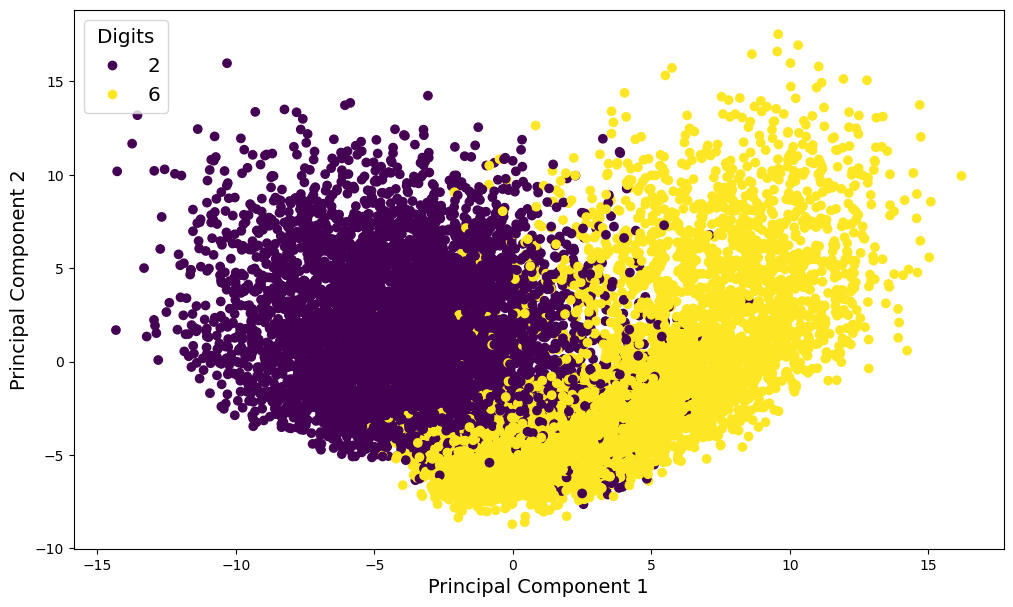

In [15]:
## Linear kernel
data_linear = np.loadtxt("outputs/dataTrans_linear_KPCAnystrom.txt",dtype=float,delimiter=',')
print("data_linear.shape:",data_linear.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,7))
scatter = plt.scatter(x=data_linear.T[0],y=data_linear.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("plot_nystrom_KPCA_linear_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


data_poly.shape: (11876, 2)


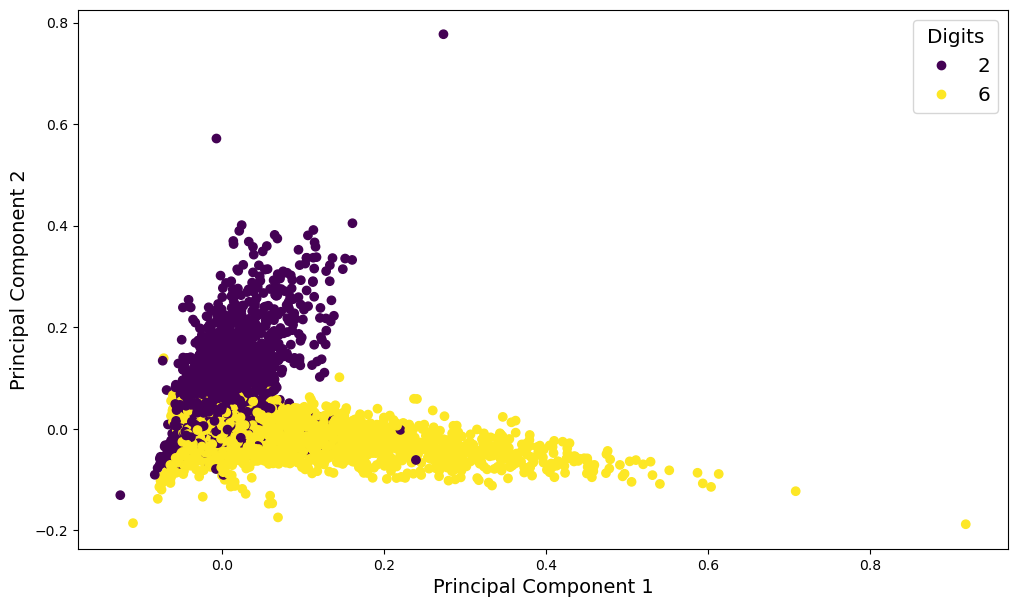

In [16]:
## poly kernel
data_poly = np.loadtxt("outputs/dataTrans_poly_KPCAnystrom.txt",dtype=float,delimiter=',')
print("data_poly.shape:",data_poly.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,7))
scatter = plt.scatter(x=data_poly.T[0],y=data_poly.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("plot_nystrom_KPCA_poly_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


data_rbf.shape: (11876, 2)


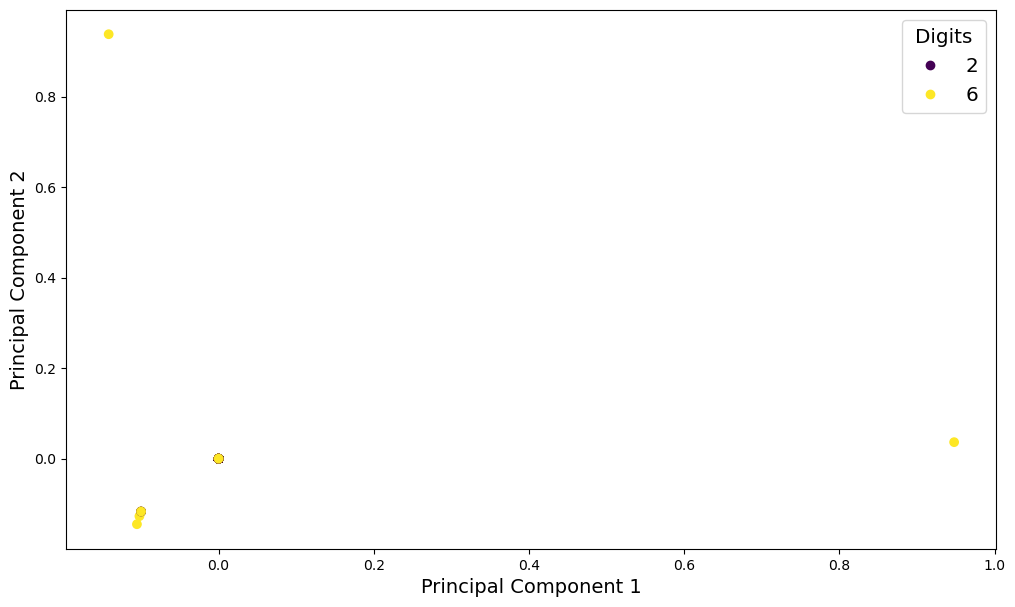

In [17]:
## poly kernel
data_rbf = np.loadtxt("outputs/dataTrans_rbf_KPCAnystrom.txt",dtype=float,delimiter=',')
print("data_rbf.shape:",data_rbf.shape)  # reduced shape / dimensionality

plt.figure(figsize=(12,7))
scatter = plt.scatter(x=data_rbf.T[0],y=data_rbf.T[1],c=labels)
plt.xlabel("Principal Component 1",size=14)
plt.ylabel("Principal Component 2",size=14)
# plt.legend(labels)

leg = plt.legend(handles=scatter.legend_elements()[0],title="digits",labels=[2,6],fontsize="x-large")
leg.set_title("Digits",prop = {'size':'x-large'})

# plt.savefig("plot_nystrom_KPCA_RBF_visualization.pdf",format='pdf',dpi=300,bbox_inches='tight')


## Scree Plots - Variance Explained Ratios

In [ ]:
nTrials = 3 # 10
nComps = 10  # number of comps with variances

var_linear, var_poly, var_rbf = np.zeros(nComps), np.zeros(nComps), np.zeros(nComps)
for i in range(nTrials):
    fName = "outputs/variances_linear_KPCA_nystrom_trial"+str(i)+".txt"
    var_linear += np.loadtxt(fName,dtype=float,delimiter=',')
#     print("\t",np.loadtxt(fName,dtype=float,delimiter=','))
    
    fName = "outputs/variances_poly_KPCA_nystrom_trial"+str(i)+".txt"
    var_poly += np.loadtxt(fName,dtype=float,delimiter=',')
#     print("\t",np.loadtxt(fName,dtype=float,delimiter=','))
    
    fName = "outputs/variances_rbf_KPCA_nystrom_trial"+str(i)+".txt"
    var_rbf += np.loadtxt(fName,dtype=float,delimiter=',')
#     print("\t",np.loadtxt(fName,dtype=float,delimiter=','))

var_linear /= nTrials
var_poly /= nTrials
var_rbf /= nTrials

print("AVERAGE EXPLAINED VARIANCES:")
print("var_linear:",var_linear)
print("var_poly:",var_poly)
print("var_rbf:",var_rbf)

print("np.sum(var_linear):",np.sum(var_linear))
print("np.sum(var_poly):",np.sum(var_poly))
print("np.sum(var_rbf):",np.sum(var_rbf))


In [ ]:

var_ratio_linear = var_linear / np.sum(var_linear)
var_ratio_poly = var_poly / np.sum(var_poly)
var_ratio_rbf = var_rbf / np.sum(var_rbf)

var_cum_linear = np.cumsum(var_ratio_linear)
var_cum_poly = np.cumsum(var_ratio_poly)
var_cum_rbf = np.cumsum(var_ratio_rbf)

plt.figure(figsize=(12,7))
plt.plot(var_cum_linear,linewidth=2)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)
# plt.savefig("outputs/plot_nystrom_linear_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

plt.figure(figsize=(12,7))
plt.plot(var_cum_poly,linewidth=2)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)
# plt.savefig("outputs/plot_nystrom_poly_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')

plt.figure(figsize=(12,7))
plt.plot(var_cum_rbf,linewidth=2)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components',size=14)
plt.ylabel('Cumulative Explained Variance',size=14)
# plt.savefig("outputs/plot_nystrom_rbf_variance_explained.pdf",format='pdf',dpi=300,bbox_inches='tight')


### Reconstruction errors

In [66]:
nTrials = 3 # 10

error_linear, error_poly, error_rbf = 0,0,0
for i in range(nTrials):
    fName = "outputs/errors_linear_KPCA_nystrom_trial"+str(i)+".txt"
    error_linear += np.loadtxt(fName,dtype=float,delimiter=',')
#     print("\t",np.loadtxt(fName,dtype=float,delimiter=','))
    
    fName = "outputs/errors_poly_KPCA_nystrom_trial"+str(i)+".txt"
    error_poly += np.loadtxt(fName,dtype=float,delimiter=',')
#     print("\t",np.loadtxt(fName,dtype=float,delimiter=','))
    
    fName = "outputs/errors_rbf_KPCA_nystrom_trial"+str(i)+".txt"
    error_rbf += np.loadtxt(fName,dtype=float,delimiter=',')
#     print("\t",np.loadtxt(fName,dtype=float,delimiter=','))

error_linear /= nTrials
error_poly /= nTrials
error_rbf /= nTrials

print("AVERAGE ERRORS:")
print("error_linear:",error_linear)
print("error_poly:",error_poly)
print("error_rbf:",error_rbf)

AVERAGE ERRORS:
error_linear: [604.05457011 585.22656353]
error_poly: [0.9649902  0.95944678]
error_rbf: [0.99983155 0.99974735]


In [89]:
np.linalg.norm(error_linear)

841.0541328193483

In [90]:
np.linalg.norm(error_poly)

1.3607880793245546

In [91]:
np.linalg.norm(error_rbf)

1.4139158028599916